# ITI distributions

In [1]:
""" 
IMPORTS
"""
import os
import autograd.numpy as np
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import brainbox.behavior.wheel as wh
from brainbox.io.one import SessionLoader
from scipy import stats

from one.api import ONE
one = ONE(base_url='https://alyx.internationalbrainlab.org')

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Functions/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'
os.chdir(functions_path)
from one_functions_generic import prepro, timeseries_PSTH
from design_functions import wheel_velocity
from data_processing import time_intervals, process_quiescence
from wheel_functions import find_periods_below_threshold, create_movement_array, stack_trial_events, wheel_trial_epoch



## Load sessions

In [2]:
# Choose a session with good QC
data_path = '/home/ines/repositories/representation_learning_variability/Video and wheel/'
# data_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Video and wheel/'

os.chdir(data_path)
pass_qc = pickle.load(open(data_path + "good_brainwide_sessions_metadata", "rb"))
pass_qc = pickle.load(open(data_path + "good_dlc_bwm_sessions_metadata", "rb"))


## Loop through sessions

### Correlations

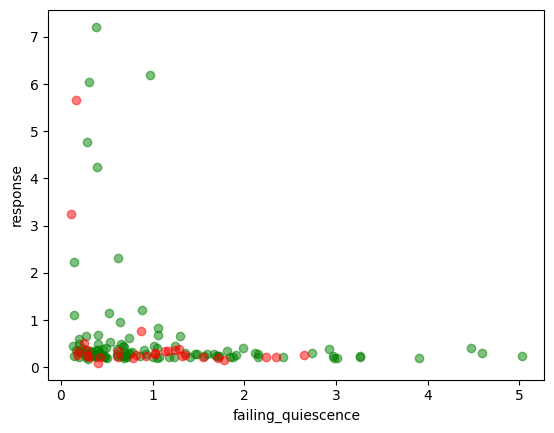

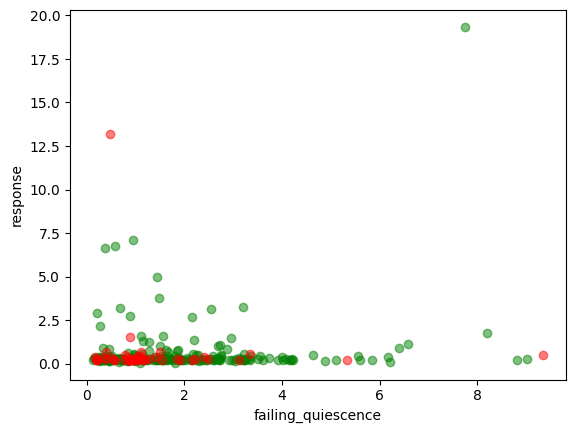

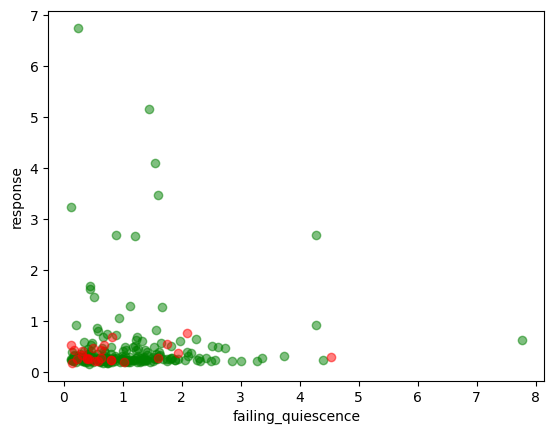

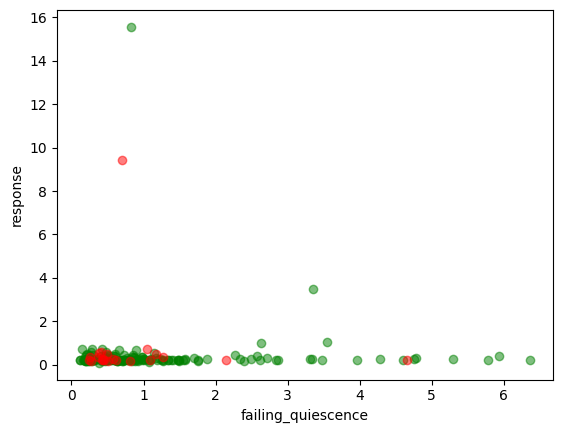

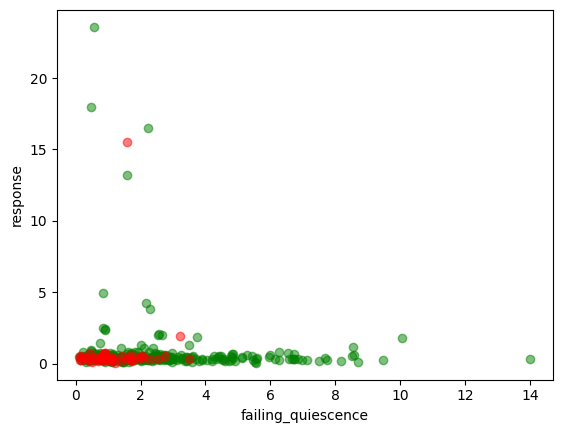

KeyboardInterrupt: 

In [3]:
hue = 'prev_feedback'
# hue='feedbackType'
vars_to_plot = ['failing_quiescence', 'response']
for s, session in enumerate(pass_qc['session_uuid']):
    
    # Get trials
    session_trials = one.load_object(seengraçadossion, obj='trials', namespace='ibl')
    session_trials = session_trials.to_df()
    
    use_trials = time_intervals(session_trials)
    use_trials = use_trials.loc[use_trials['elongated_quiesc']==1]

    # Plot distributions
    correct_data = use_trials.loc[use_trials[hue]==1]
    incorrect_data = use_trials.loc[use_trials[hue]==-1]
    plt.scatter(correct_data[vars_to_plot[0]], correct_data[vars_to_plot[1]], color='green', alpha=0.5)
    plt.scatter(incorrect_data[vars_to_plot[0]], incorrect_data[vars_to_plot[1]], color='red', alpha=0.5)
    plt.xlabel(vars_to_plot[0])
    plt.ylabel(vars_to_plot[1])
    plt.show()


### Barplots

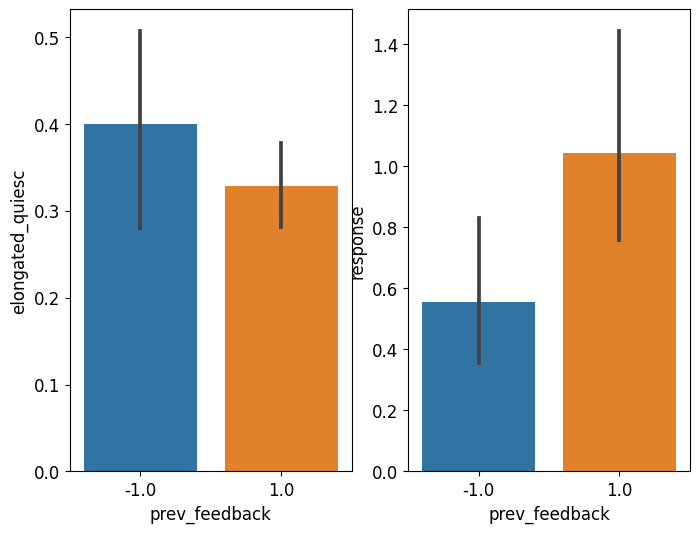

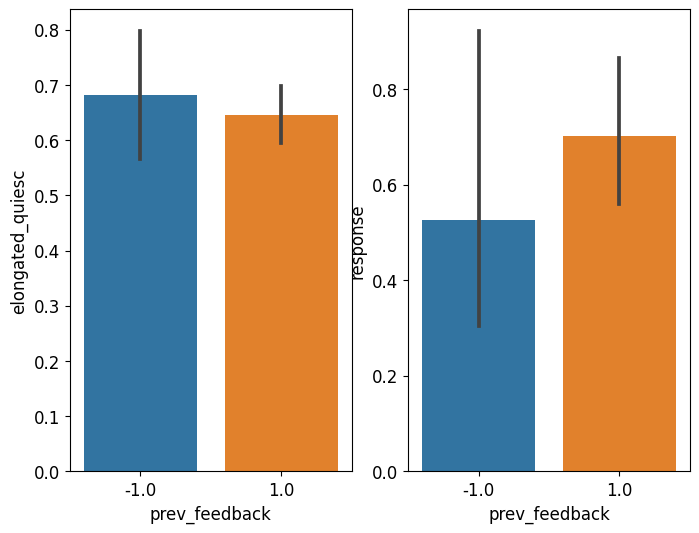

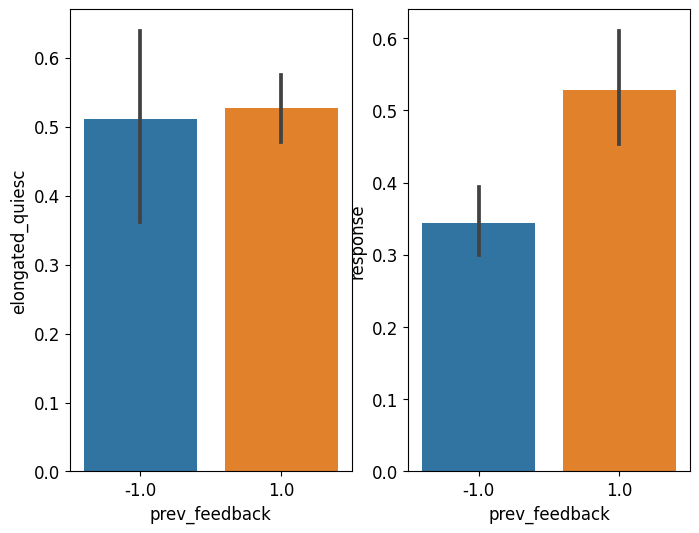

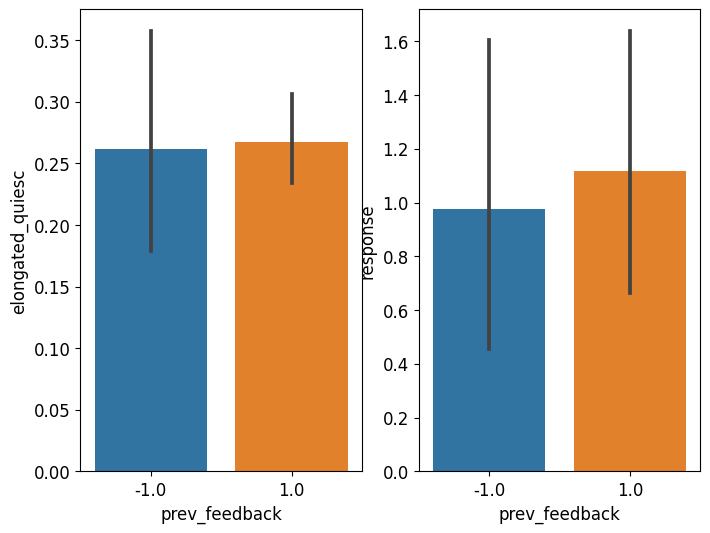

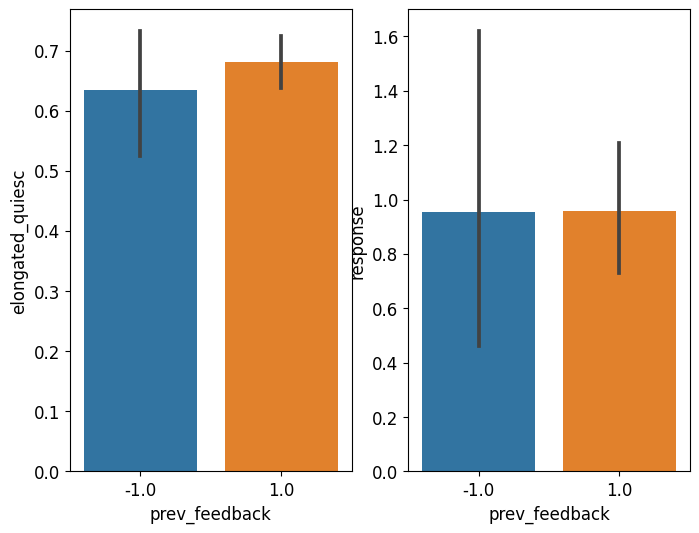

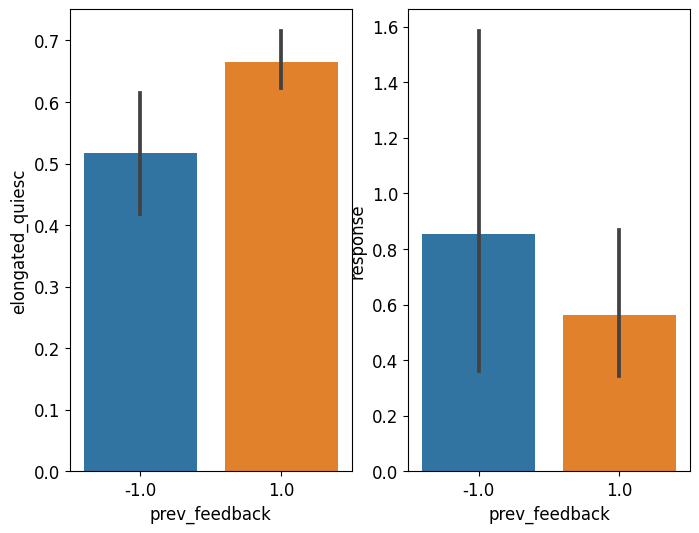

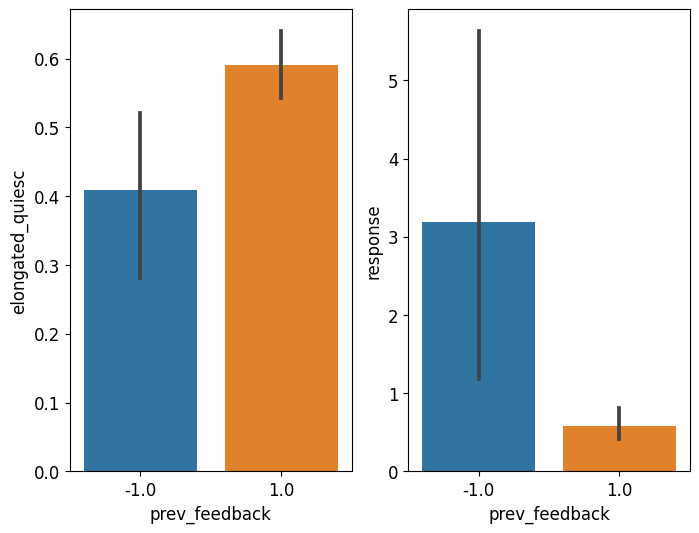

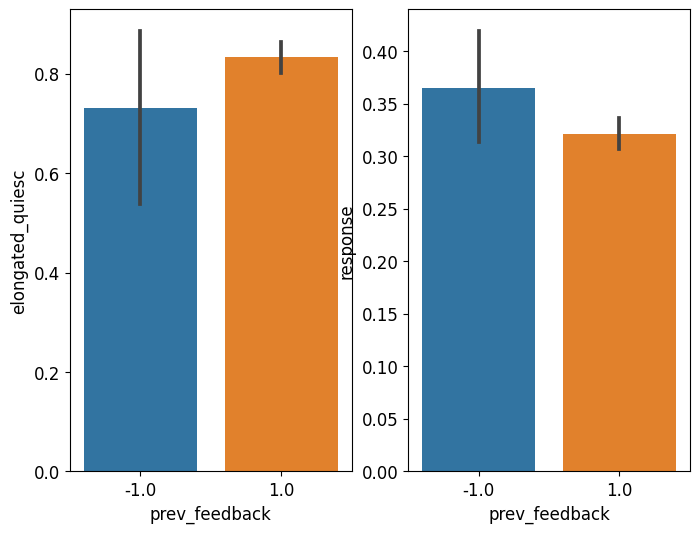

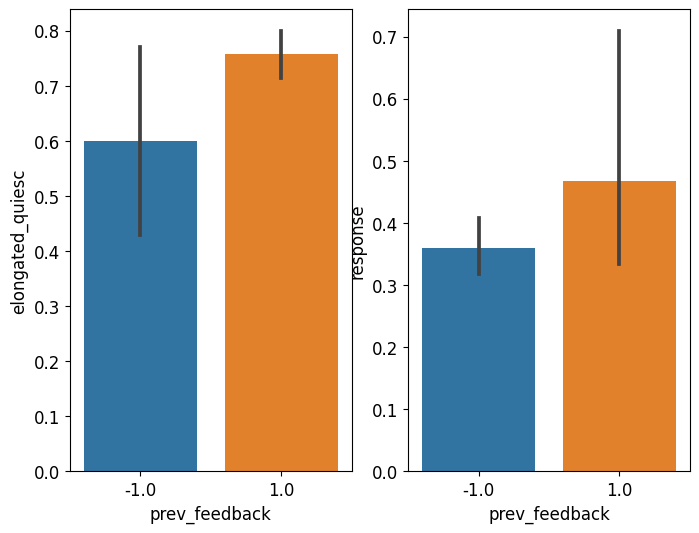

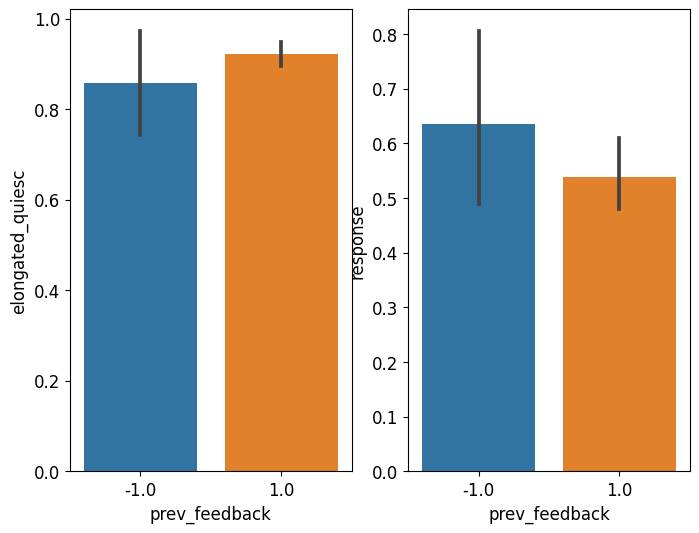

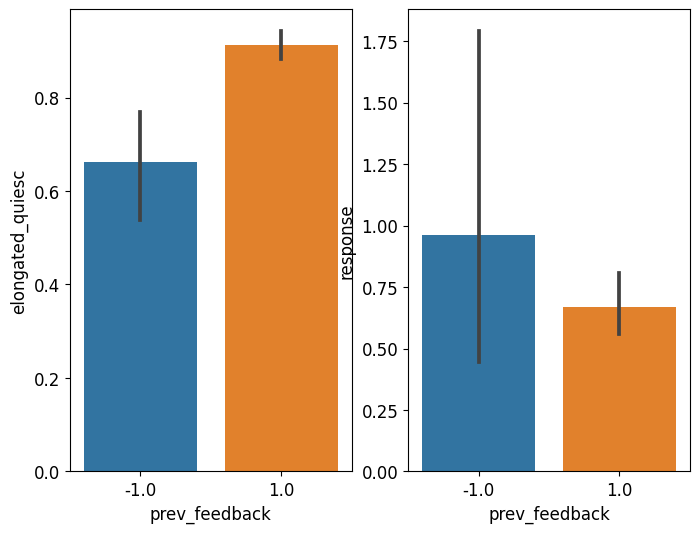

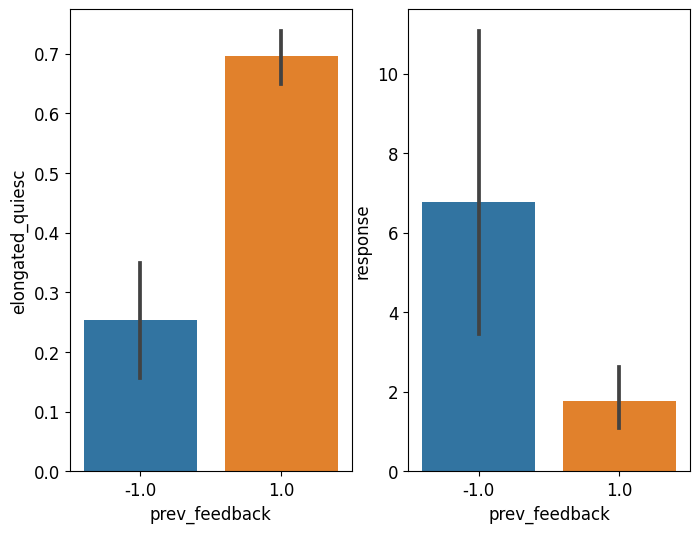

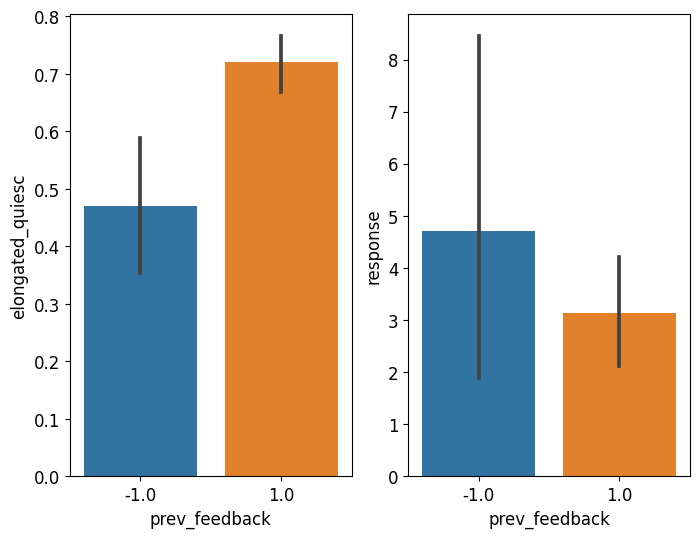

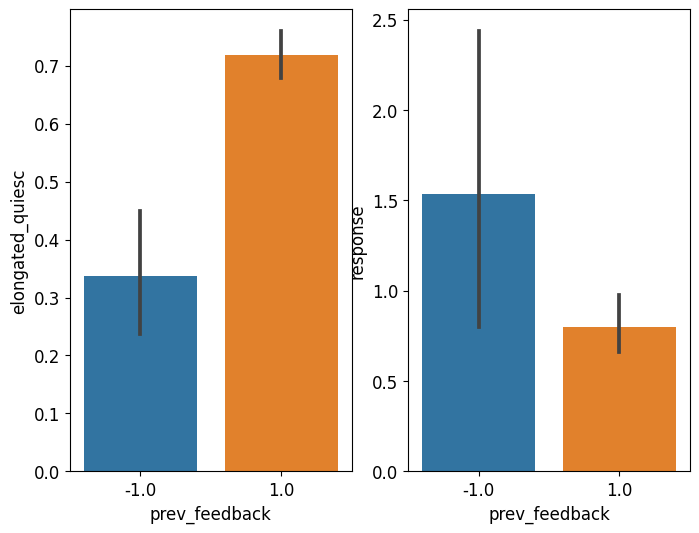

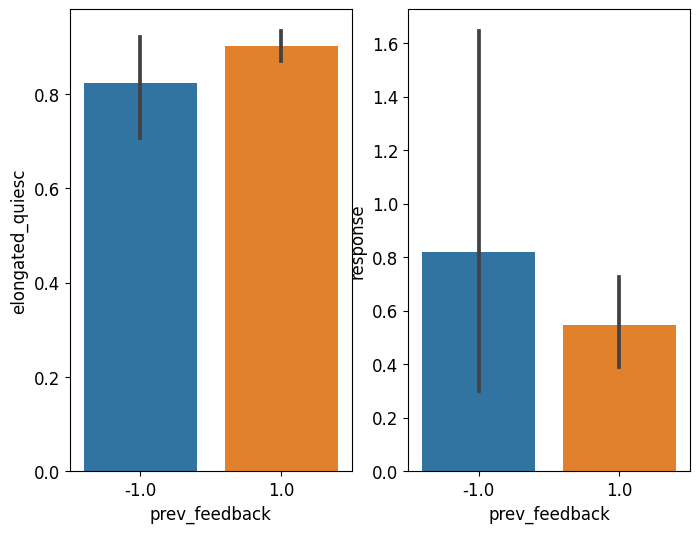

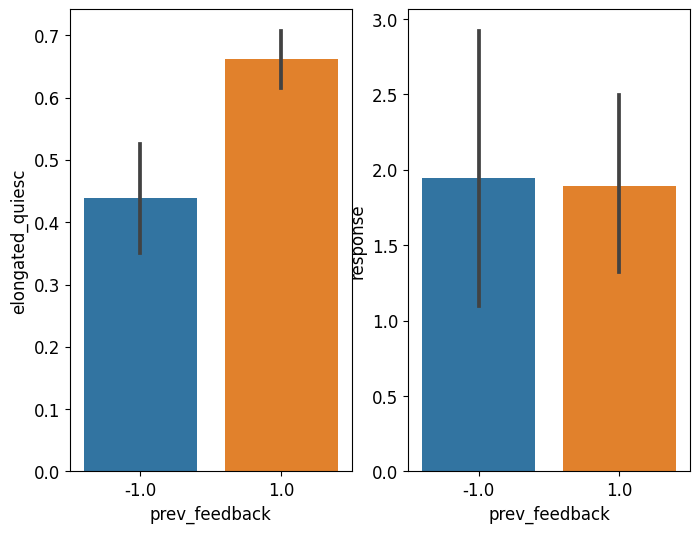

KeyboardInterrupt: 

In [10]:
x = 'prev_feedback'
hue='feedbackType'
# x = 'feedbackType'
# x='elongated_quiesc'
vars_to_plot = ['failing_quiescence', 'reaction_time']
vars_to_plot = ['elongated_quiesc', 'response']
for s, session in enumerate(pass_qc['session_uuid']):
    
    # Get trials
    session_trials = one.load_object(session, obj='trials', namespace='ibl')
    session_trials = session_trials.to_df()
    
    use_trials = time_intervals(session_trials)

    # Plot distributions
    fig, axs = plt.subplots(nrows=1, ncols=len(vars_to_plot), sharex=True, sharey=False, figsize=[8, 6])
    plt.rc('font', size=12)
    
    for v, var in enumerate(vars_to_plot):
        # sns.histplot(x=var, hue='feedbackType', data=use_data)
        sns.barplot(x=x, y=var, data=use_trials, ax=axs[v])
    plt.show()



### Across sessions

In [76]:
cross_session = pd.DataFrame(columns=['session_uuid', 'performance_easy', 'fraction_elongated'], index=range(len(pass_qc))
                             )
for s, session in enumerate(pass_qc['session_uuid']):
    
    # Get trials
    session_trials = one.load_object(session, obj='trials', namespace='ibl')
    session_trials = session_trials.to_df()
    use_trials = time_intervals(session_trials)

    cross_session['session_uuid'][s] = session
    cross_session['performance_easy'][s] = len(use_trials.loc[use_trials['correct_easy']==1]
                                               ) / len(use_trials.loc[use_trials['contrast']>=0.5])
    cross_session['fraction_elongated'][s] = np.nanmean(use_trials['elongated_quiesc'])
    
plt.scatter(cross_session['performance_easy'], cross_session['fraction_elongated'])

local md5 mismatch on dataset: churchlandlab/Subjects/CSHL049/2020-01-11/001/alf/_ibl_trials.stimOff_times.npy
/Users/ineslaranjeira/Downloads/FlatIron/churchlandlab/Subjects/CSHL049/2020-01-11/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.60k/4.60k [00:00<00:00, 15.7kB/s]
local md5 mismatch on dataset: cortexlab/Subjects/KS014/2019-12-03/001/alf/_ibl_trials.goCueTrigger_times.npy
/Users/ineslaranjeira/Downloads/FlatIron/cortexlab/Subjects/KS014/2019-12-03/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.38k/4.38k [00:00<00:00, 14.1kB/s]
local md5 mismatch on dataset: cortexlab/Subjects/KS014/2019-12-07/001/alf/_ibl_trials.goCueTrigger_times.npy
/Users/ineslaranjeira/Downloads/FlatIron/cortexlab/Subjects/KS014/2019-12-07/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.38k/5.38k [00:00<00:00, 18.3kB/s]
local md5 mismatch on dataset: cortexlab/Subjects/KS023/2019-12-06/001/alf/_ibl_trials.goCueTrigger_times.npy
/Users/ineslaranjeira/Downloads/Flat

In [5]:
def stack_trial_events(one, session_trials, trials_to_plot, session_eid, time_max):

    # PLOT
    fig, axs = plt.subplots(nrows=trials_to_plot, ncols=1, sharex=True, sharey=False, figsize=[18, 14])
    plt.rc('font', size=12)
    y = [-10, 10]
    bin_size = 0.05
    time_min = -0.1
    threshold = 0.25 # Need to check if this makes sense
    min_period = 200 # This is approximately 200 ms
    custom_palette = sns.color_palette("viridis", n_colors=3)
    custom_palette

    use_data = session_trials.reset_index()
    for t, trial in enumerate(range(trials_to_plot)):

        trial_start = use_data.loc[use_data['index']==t, 'intervals_0']
        next_trial = use_data.loc[use_data['index']==t+1]
        trial_data = use_data.loc[use_data['index']==t]
        trial_feedback = trial_data['feedbackType']
        trial_choice = trial_data['choice']

        axs[t].vlines(np.array(trial_data['stimOn_times']) - trial_start,
                        -10, 10, label='Stim On', color='Black', linewidth=2)
        axs[t].vlines(np.array(trial_data['firstMovement_times']) - trial_start, -10, 10, 
                        label='First movement', color='Blue', linewidth=2)
        axs[t].vlines(np.array((trial_data['goCueTrigger_times'] - trial_data['quiescencePeriod'])) - trial_start,
                        -10, 10, label='Quiescence start', color='Purple', linewidth=2)
        axs[t].vlines(np.array(trial_data['stimOff_times']) - trial_start,
                        -10, 10, label='Stim Off', color='Brown', linewidth=2)
        # axs[t].vlines(np.array(trial_data['intervals_1']) - trial_start,
        #                 -10, 10, label='Trial end', color='Orange', linewidth=2)
        axs[t].vlines(np.array(next_trial['intervals_0']) - trial_start,
                        -10, 10, label='Next trial start', color='Grey', linewidth=2)  
        axs[t].vlines(np.array((next_trial['goCueTrigger_times'] - next_trial['quiescencePeriod'])) - trial_start,
                        -10, 10, label='Quiescence start', color='Purple', linewidth=2)
        
        if list(trial_choice)[0] == 1.:
            axs[t].fill_betweenx(y, list(trial_data['firstMovement_times'])[0]-list(trial_start)[0], 
                        list(trial_data['feedback_times'])[0]-list(trial_start)[0], color='Purple', alpha=.6)
            if list(trial_feedback)[0] == 1:
                    axs[t].fill_betweenx(y, list(trial_data['stimOn_times'])[0]-list(trial_start)[0],
                            list(trial_data['firstMovement_times'])[0]-list(trial_start)[0], color='Green', alpha=.3)
            else:
                    axs[t].fill_betweenx(y, list(trial_data['stimOn_times'])[0]-list(trial_start)[0],
                            list(trial_data['firstMovement_times'])[0]-list(trial_start)[0], color='Purple', alpha=.3)
        elif list(trial_choice)[0] == -1.:
            axs[t].fill_betweenx(y, list(trial_data['firstMovement_times'])[0]-list(trial_start)[0], 
                        list(trial_data['feedback_times'])[0]-list(trial_start)[0], color='Green', alpha=.6)
            if list(trial_feedback)[0] == 1:
                    axs[t].fill_betweenx(y, list(trial_data['stimOn_times'])[0]-list(trial_start)[0],
                            list(trial_data['firstMovement_times'])[0]-list(trial_start)[0], color='Purple', alpha=.3)
            else:
                    axs[t].fill_betweenx(y, list(trial_data['stimOn_times'])[0]-list(trial_start)[0],
                            list(trial_data['firstMovement_times'])[0]-list(trial_start)[0], color='Green', alpha=.3)
                    
        if list(trial_feedback)[0] == 1:
            axs[t].vlines(np.array(trial_data['feedback_times']) - trial_start,
                        -10, 10, label='Correct', color='Green', linewidth=2)
            axs[t].fill_betweenx(y, list(trial_data['feedback_times'])[0]-list(trial_start)[0], 
                          list(trial_data['stimOff_times'])[0]-list(trial_start)[0], color='Blue', alpha=.3)
        else:
            axs[t].vlines(np.array(trial_data['feedback_times']) - trial_start,
                        -10, 10, label='Incorrect', color='Red', linewidth=2)
            axs[t].fill_betweenx(y, list(trial_data['feedback_times'])[0]-list(trial_start)[0], 
                          list(trial_data['stimOff_times'])[0]-list(trial_start)[0], color='Red', alpha=.3)
            

        axs[t].fill_betweenx(y, 0, list(trial_data['goCueTrigger_times'] - 
                          trial_data['quiescencePeriod'])[0]-list(trial_start)[0], color='Grey', alpha=1)
        axs[t].fill_betweenx(y, list(trial_data['goCueTrigger_times'] - 
                          trial_data['quiescencePeriod'])[0]-list(trial_start)[0], 
                          list(trial_data['stimOn_times'])[0]-list(trial_start)[0], color='Orange', alpha=0.6)

        # axs[t].fill_betweenx(y, list(trial_data['stimOff_times'])[0]-list(trial_start)[0],
        #                      list(trial_data['intervals_1'])[0]-list(trial_start)[0], color=custom_palette[2], alpha=1)
        axs[t].fill_betweenx(y, list(trial_data['stimOff_times'])[0]-list(trial_start)[0],
                             list(next_trial['intervals_0'])[0]-list(trial_start)[0], color='Grey', alpha=1)
        # axs[t].fill_betweenx(y, list(next_trial['intervals_0'])[0] - list(trial_start)[0], 
        #                      list(next_trial['goCueTrigger_times'] - 
        #                   next_trial['quiescencePeriod'])[0]-list(trial_start)[0], color=custom_palette[0], alpha=1)
        
        # Wheel
        wheel_data = one.load_object(session_eid, 'wheel', collection='alf')
        pos, wheel_times = wh.interpolate_position(wheel_data.timestamps, wheel_data.position)
        # Calculate wheel velocity
        wheel_vel = wheel_velocity(bin_size, wheel_times, pos, use_data)
        wheel_trace = np.array(wheel_vel['avg_wheel_vel'])

        xx = wheel_times - list(trial_start)[0]
        yy = wheel_trace

        trial_time_max = list(np.array(next_trial['goCueTrigger_times'] - 
                                        next_trial['quiescencePeriod']) - trial_start)[0]
        mask = np.where((xx <trial_time_max) & (xx> time_min))
        wheel_max = np.max(wheel_trace[mask])
        wheel_min = np.min(wheel_trace[mask])

        # Plot wheel
        axs[t].plot(xx[mask], yy[mask], color='Black')

        # Compute stillness
        periods_below_threshold = find_periods_below_threshold(wheel_trace, threshold, min_period)
        stillness_array = create_movement_array(wheel_trace, periods_below_threshold)
        movement_array = stillness_array.copy()
        movement_array[movement_array >0] = np.nan 
        stillness_array[stillness_array==0] = np.nan 
        stillness_array[stillness_array==1] = 0

        # Plot movement and stilness
        axs[t].plot(xx[mask], stillness_array[mask], color='Orange')
        axs[t].plot(xx[mask], movement_array[mask], color='Blue')
        
        axs[t].set_ylim([wheel_min, wheel_max])
        axs[t].set_yticks([] ,[])
    axs[t].set_xlabel(str('Time from trial start (s)'))
    axs[t].set_xlim([time_min, time_max])
    axs[t].legend(loc='upper left', bbox_to_anchor=(1, -0.5))
    plt.show()


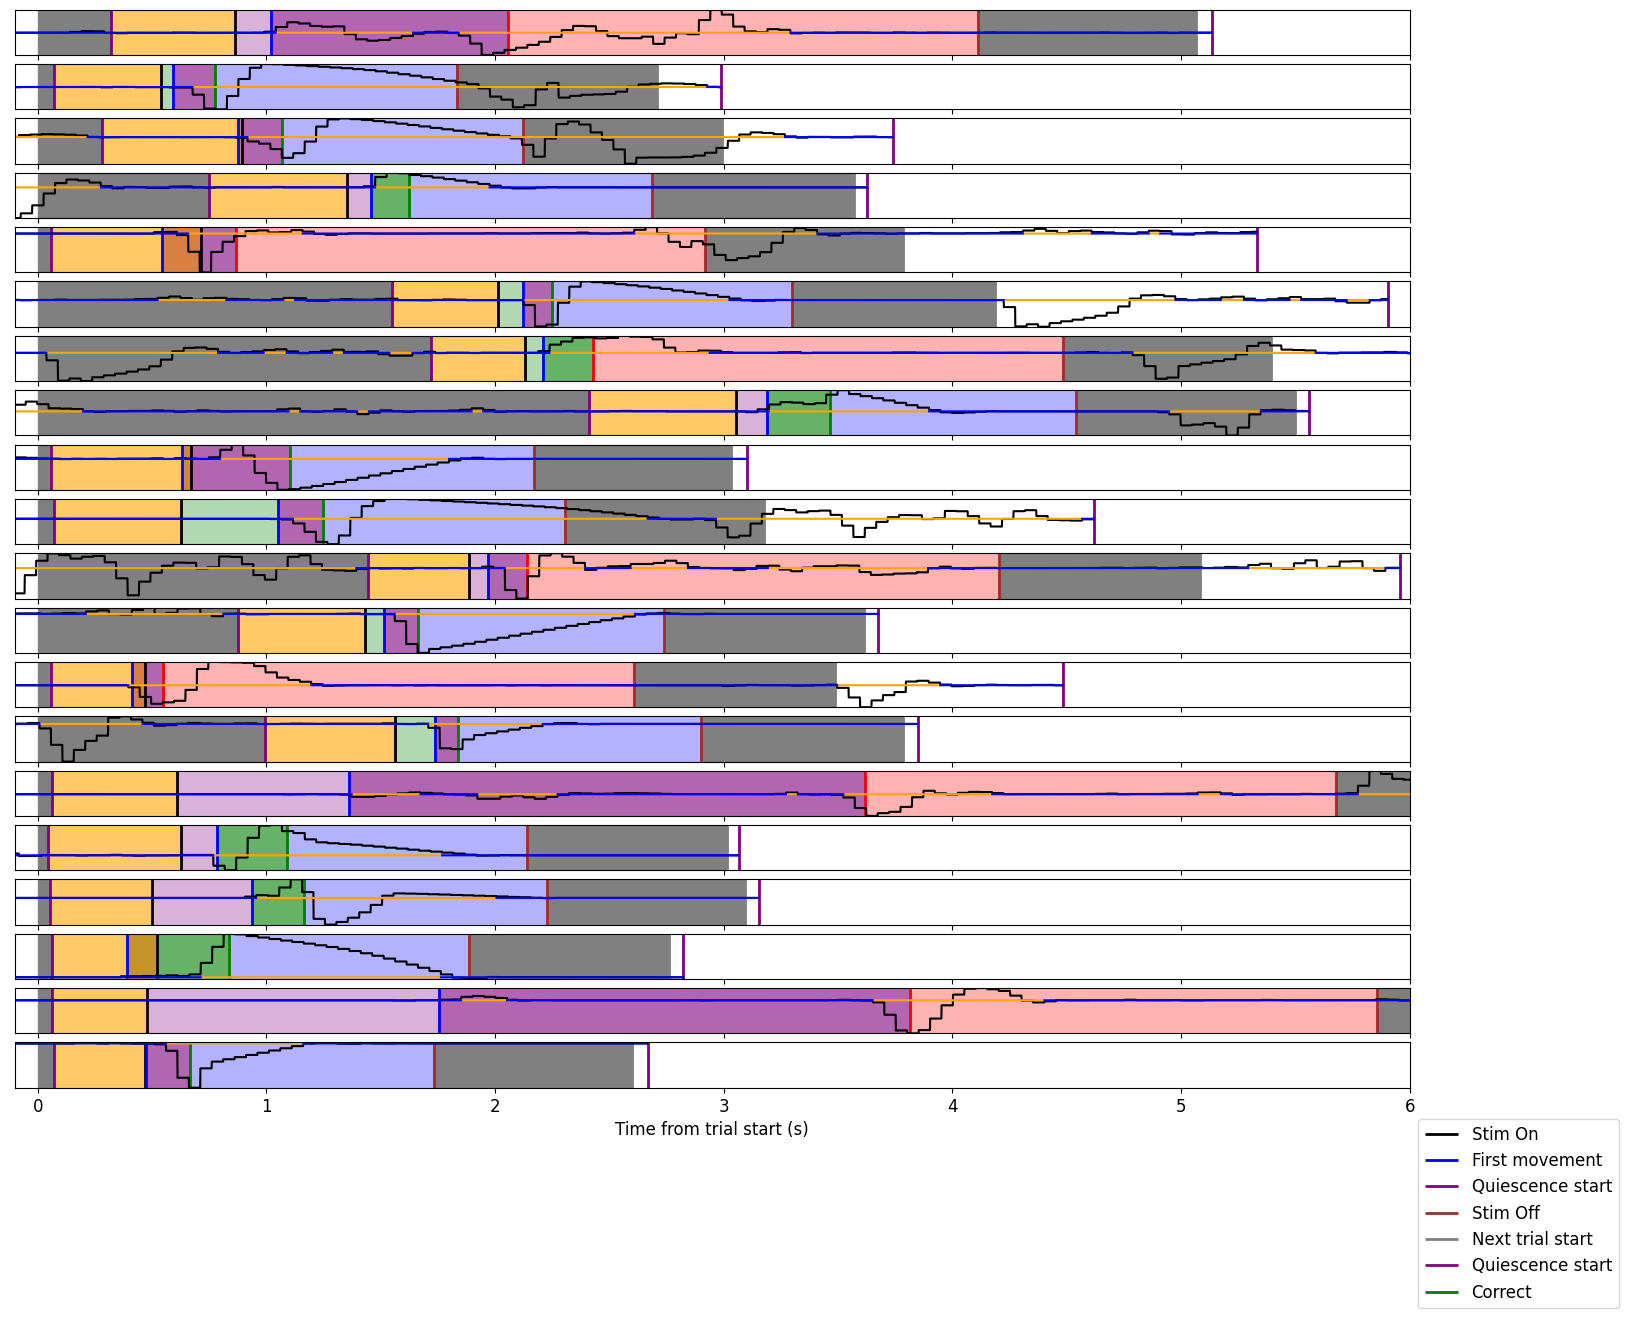

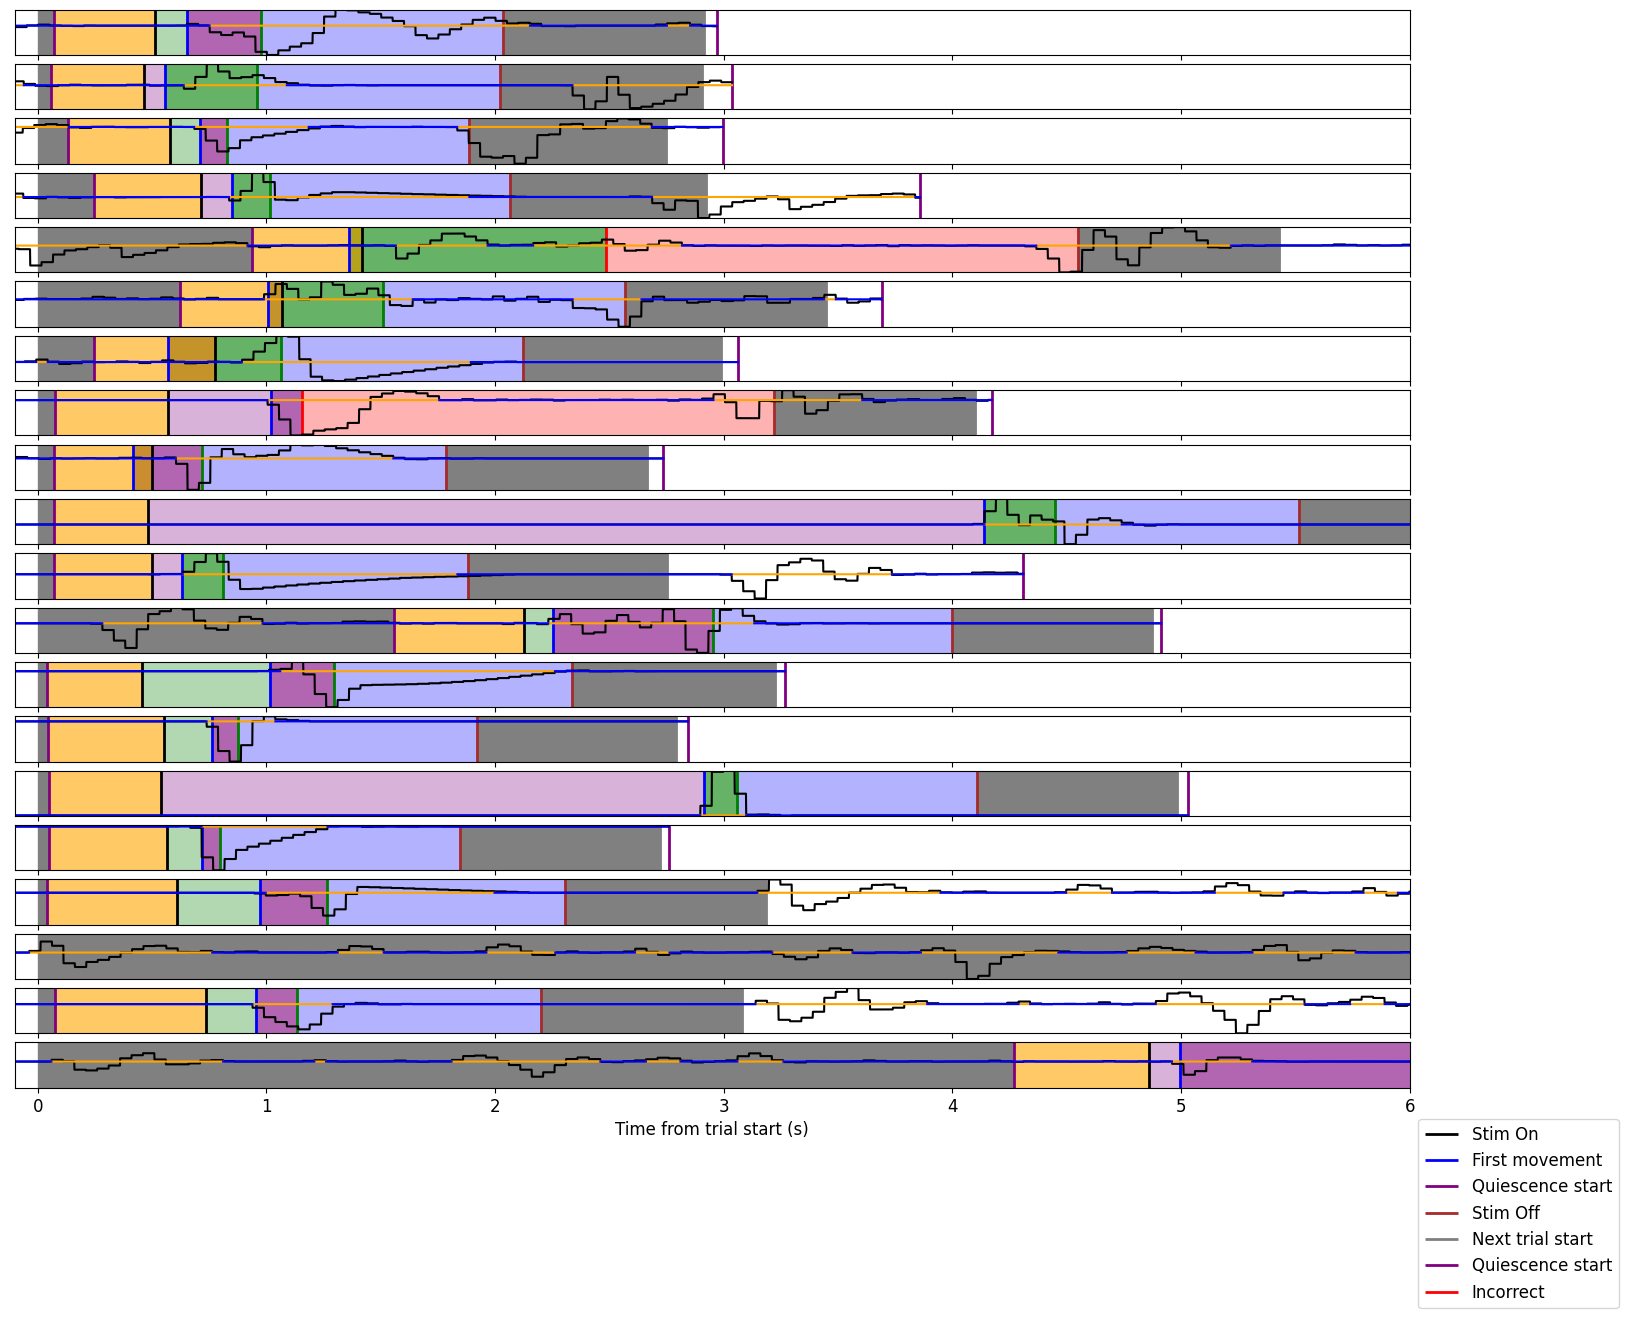

In [6]:
for s, session in enumerate(pass_qc['session_uuid'][1:3]):

    # Get trials
    session_trials = one.load_object(session, obj='trials', namespace='ibl')
    session_trials = session_trials.to_df()
    
    trials_to_plot = 20
    time_max = 6
    stack_trial_events(one, session_trials, trials_to_plot, session, time_max)

## Compute stillness

In [9]:
for s, session in enumerate(pass_qc['session_uuid'][1:3]):

    try:
        # Get trials
        session_trials = one.load_object(session, obj='trials', namespace='ibl')
        session_trials = session_trials.to_df()
        
        bin_size = 0.05
        df = wheel_trial_epoch(one, session_trials, session, bin_size).dropna()
        df['time_count'] = np.ones(len(df['movement']))
        
        processed_quiescence = process_quiescence(df)

        # PLOT
        vars_to_plot = ['quiesc_length', 'time_to_quiesc', 'pre_quiesc_move_duration',
                        'pre_quiesc_move_count']
        var_names = ['Quiescence length', 'Time to quiescence', 'Pre-qui movement duration',
                    'Pre-qui movement count']
        fig, axs = plt.subplots(nrows=2, ncols=len(vars_to_plot), sharex=True, sharey=False, figsize=[12, 6])
        plt.rc('font', size=12)
        for v, var in enumerate(vars_to_plot):
            
            sns.barplot(y=var, x='feedback', data=processed_quiescence, ax=axs[0, v])
            sns.barplot(y=var, x='next_feedback', data=processed_quiescence, ax=axs[1, v])
            axs[0, v].set_ylabel(var_names[v])
            axs[1, v].set_ylabel(var_names[v])
            axs[0, v].set_xlabel('Feedback')
            axs[1, v].set_xlabel('Next feedback')
        plt.tight_layout()
        plt.show()
    except:
        print(session)

/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f88d4dd4-ccd7-400e-9035-fa00be3bcfa8


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


83d85891-bd75-4557-91b4-1cbb5f8bfc9d


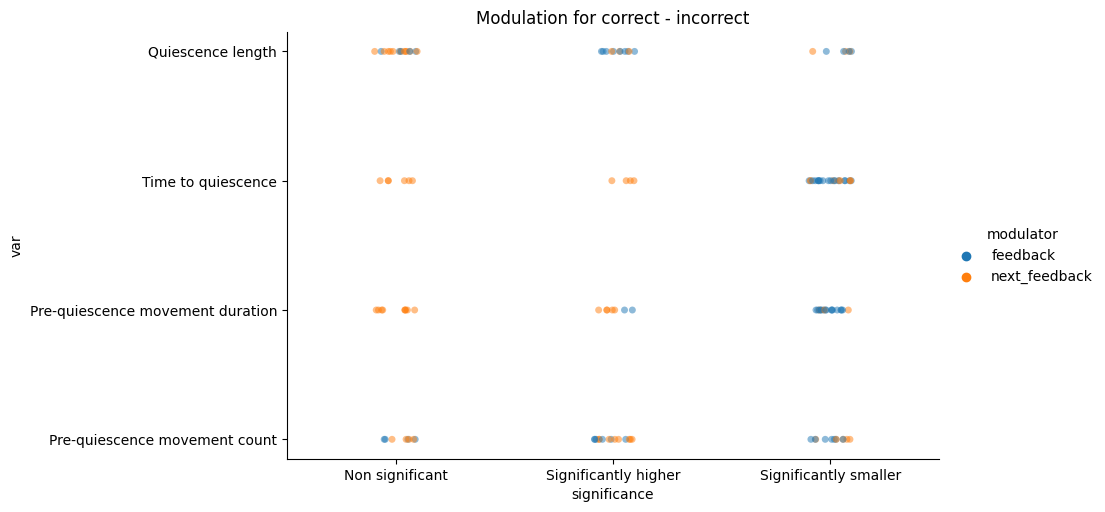

In [10]:
hue_names = np.array(['correct', 'incorrect'])
hue_numbers = np.array([1., -1.])

sns.catplot(y='var', x='significance', hue='modulator', data=p_values, 
order=['Non significant', 'Significantly higher', 'Significantly smaller'],
height=5, aspect=2, alpha=0.5, estimator='mean')

plt.title(str('Modulation for ' + str(hue_names[np.where(hue_numbers==hues[1])][0]) + 
            ' - ' + str(hue_names[np.where(hue_numbers==hues[0])][0])))
plt.show()


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f88d4dd4-ccd7-400e-9035-fa00be3bcfa8


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


83d85891-bd75-4557-91b4-1cbb5f8bfc9d


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


aec5d3cc-4bb2-4349-80a9-0395b76f04e2


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ee212778-3903-4f5b-ac4b-a72f22debf03


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


71855308-7e54-41d7-a7a4-b042e78e3b4f


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f359281f-6941-4bfd-90d4-940be22ed3c3


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


51e53aff-1d5d-4182-a684-aba783d50ae5


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


537677fe-1e24-4755-948c-fa4a4e8ecce5


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


5bcafa14-71cb-42fa-8265-ce5cda1b89e0
d32876dd-8303-4720-8e7e-20678dc2fd71
72982282-e493-45ee-87ce-aa45cb3a3ec1
6434f2f5-6bce-42b8-8563-d93d493613a2
64e3fb86-928c-4079-865c-b364205b502e
15948667-747b-4702-9d53-354ac70e9119
288bfbf3-3700-4abe-b6e4-130b5c541e61
fc43390d-457e-463a-9fd4-b94a0a8b48f5
3d59aa1a-b4ba-47fe-b9cf-741b5fdb0c7b


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


dfd8e7df-dc51-4589-b6ca-7baccfeb94b4


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


fa704052-147e-46f6-b190-a65b837e605e


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


46794e05-3f6a-4d35-afb3-9165091a5a74


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


7939711b-8b4d-4251-b698-b97c1eaa846e


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


b52182e7-39f6-4914-9717-136db589706e


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


2d5f6d81-38c4-4bdc-ac3c-302ea4d5f46e


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


c99d53e6-c317-4c53-99ba-070b26673ac4


local md5 mismatch on dataset: churchlandlab/Subjects/CSHL049/2020-01-11/001/alf/_ibl_trials.stimOff_times.npy
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL049/2020-01-11/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.60k/4.60k [00:00<00:00, 15.6kB/s]
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


d839491f-55d8-4cbe-a298-7839208ba12b


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ecb5520d-1358-434c-95ec-93687ecd1396


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


3663d82b-f197-4e8b-b299-7b803a155b84


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


a71175be-d1fd-47a3-aa93-b830ea3634a1


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f312aaec-3b6f-44b3-86b4-3a0c119c0438


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


fb70ebf7-8175-42b0-9b7a-7c6e8612226e


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


28741f91-c837-4147-939e-918d38d849f2


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


57b5ae8f-d446-4161-b439-b191c5e3e77b


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


dda5fc59-f09a-4256-9fb5-66c67667a466


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


d16a9a8d-5f42-4b49-ba58-1746f807fcc1


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


37e96d0b-5b4b-4c6e-9b29-7edbdc94bbd0


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


2e6e179c-fccc-4e8f-9448-ce5b6858a183


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


1191f865-b10a-45c8-9c48-24a980fd9402
f10efe41-0dc0-44d0-8f26-5ff68dca23e9
6364ff7f-6471-415a-ab9e-632a12052690
7be8fec4-406b-4e74-8548-d2885dcc3d5e


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


1f095590-6669-46c9-986b-ccaf0620c5e9


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


111c1762-7908-47e0-9f40-2f2ee55b6505


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


32d27583-56aa-4510-bc03-669036edad20


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ebc9392c-1ecb-4b4b-a545-4e3d70d23611


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f99ac31f-171b-4208-a55d-5644c0ad51c3


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
local md5 mismatch on dataset: cortexlab/Subjects/KS014/2019-12-03/001/alf/_ibl_trials.goCueTrigger_times.npy


bda2faf5-9563-4940-a80f-ce444259e47b


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS014/2019-12-03/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.38k/4.38k [00:00<00:00, 12.0kB/s]
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


16693458-0801-4d35-a3f1-9115c7e5acfd


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
local md5 mismatch on dataset: cortexlab/Subjects/KS014/2019-12-07/001/alf/_ibl_trials.goCueTrigger_times.npy


e1931de1-cf7b-49af-af33-2ade15e8abe7


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS014/2019-12-07/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.38k/5.38k [00:00<00:00, 16.4kB/s]
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


b9c205c3-feac-485b-a89d-afc96d9cb280


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
local md5 mismatch on dataset: cortexlab/Subjects/KS023/2019-12-06/001/alf/_ibl_trials.goCueTrigger_times.npy


15f742e1-1043-45c9-9504-f1e8a53c1744


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-06/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.35k/5.35k [00:00<00:00, 15.2kB/s]
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


a4000c2f-fa75-4b3e-8f06-a7cf599b87ad


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
local md5 mismatch on dataset: cortexlab/Subjects/KS023/2019-12-08/001/alf/_ibl_trials.goCueTrigger_times.npy


cc45c568-c3b9-4f74-836e-c87762e898c8


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-08/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.53k/6.53k [00:00<00:00, 20.3kB/s]
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
local md5 mismatch on dataset: cortexlab/Subjects/KS023/2019-12-10/001/alf/_ibl_trials.goCueTrigger_times.npy


a92c4b1d-46bd-457e-a1f4-414265f0e2d4


/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-10/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.26k/5.26k [00:00<00:00, 15.6kB/s]
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


a6fe44a8-07ab-49b8-81f9-e18575aa85cc
0a018f12-ee06-4b11-97aa-bbbff5448e9f


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


4503697e-af44-47d9-898d-4924be990240


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


b22f694e-4a34-4142-ab9d-2556c3487086


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ffef0311-8ffa-49e3-a857-b3adf6d86e12


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


196a2adf-ff83-49b2-823a-33f990049c2e


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f819d499-8bf7-4da0-a431-15377a8319d5


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


a2701b93-d8e1-47e9-a819-f1063046f3e7


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


0f25376f-2b78-4ddc-8c39-b6cdbe7bf5b9


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ee13c19e-2790-4418-97ca-48f02e8013bb


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


3c851386-e92d-4533-8d55-89a46f0e7384


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


6668c4a0-70a4-4012-a7da-709660971d7a
90d1e82c-c96f-496c-ad4e-ee3f02067f25


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


02fbb6da-3034-47d6-a61b-7d06c796a830


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


e535fb62-e245-4a48-b119-88ce62a6fe67


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f25642c6-27a5-4a97-9ea0-06652db79fbd


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


4720c98a-a305-4fba-affb-bbfa00a724a4


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


7622da34-51b6-4661-98ae-a57d40806008


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

ee8b36de-779f-4dea-901f-e0141c95722b


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

c3d9b6fb-7fa9-4413-a364-92a54df0fc5d


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


aa20388b-9ea3-4506-92f1-3c2be84b85db


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


251ece37-7798-477c-8a06-2845d4aa270c


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


e8b4fda3-7fe4-4706-8ec2-91036cfee6bd


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


64977c74-9c04-437a-9ea1-50386c4996db


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


9a6e127b-bb07-4be2-92e2-53dd858c2762


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


90e524a2-aa63-47ce-b5b8-1b1941a1223a


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


1d4a7bd6-296a-48b9-b20e-bd0ac80750a5


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


58c4bf97-ec3b-45b4-9db4-d5d9515d5b00


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


8b1f4024-3d96-4ee7-95f9-8a1dfd4ce4ef
68775ca0-b056-48d5-b6ae-a4c2a76ae48f


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f27e6cd6-cdd3-4524-b8e3-8146046e2a7d


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


1b61b7f2-a599-4e40-abd6-3e758d2c9e25


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f3ce3197-d534-4618-bf81-b687555d1883


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


6f09ba7e-e3ce-44b0-932b-c003fb44fb89


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


695a6073-eae0-49e0-bb0f-e9e57a9275b9


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


6fb1e12c-883b-46d1-a745-473cde3232c8


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


c6db3304-c906-400c-aa0f-45dd3945b2ea
4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


360eac0c-7d2d-4cc1-9dcf-79fc7afc56e7
d7e60cc3-6020-429e-a654-636c6cc677ea


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


a4747ac8-6a75-444f-b99b-696fff0243fd


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


746d1902-fa59-4cab-b0aa-013be36060d5


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


56bc129c-6265-407a-a208-cc16d20a6c01


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


1a507308-c63a-4e02-8f32-3239a07dc578


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f5591ac5-311d-4fa8-9bad-029d7be9c491


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ab8a0899-a59f-42e4-8807-95b14056104b


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


71e03be6-b497-4991-a121-9416dcc1a6e7


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


d0ea3148-948d-4817-94f8-dcaf2342bbbe


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


4aa1d525-5c7d-4c50-a147-ec53a9014812


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


9b5a1754-ac99-4d53-97d3-35c2f6638507


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


2c44a360-5a56-4971-8009-f469fb59de98


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


3f6e25ae-c007-4dc3-aa77-450fd5705046
113c5b6c-940e-4b21-b462-789b4c2be0e5


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


72cb5550-43b4-4ef0-add5-e4adfdfb5e02
d0c91c3c-8cbb-4929-8657-31f18bffc294


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


6f6d2c8e-28be-49f4-ae4d-06be2d3148c1


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


88224abb-5746-431f-9c17-17d7ef806e6a


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


7cec9792-b8f9-4878-be7e-f08103dc0323


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


21e16736-fd59-44c7-b938-9b1333d25da8


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


53738f95-bd08-4d9d-9133-483fdb19e8da


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


d33baf74-263c-4b37-a0d0-b79dcb80a764


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


259927fd-7563-4b03-bc5d-17b4d0fa7a55


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


510b1a50-825d-44ce-86f6-9678f5396e02


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ff4187b5-4176-4e39-8894-53a24b7cf36b


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


465c44bd-2e67-4112-977b-36e1ac7e3f8c


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


e49d8ee7-24b9-416a-9d04-9be33b655f40


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ee40aece-cffd-4edb-a4b6-155f158c666a


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f8d5c8b0-b931-4151-b86c-c471e2e80e5d


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


cb2ad999-a6cb-42ff-bf71-1774c57e5308


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


934dd7a4-fbdc-459c-8830-04fe9033bc28


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


fe1fd79f-b051-411f-a0a9-2530a02cc78d
03063955-2523-47bd-ae57-f7489dd40f15


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


45ef6691-7b80-4a43-bd1a-85fc00851ae8
fc14c0d6-51cf-48ba-b326-56ed5a9420c3


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


7416f387-b302-4ca3-8daf-03b585a1b7ec


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


1928bf72-2002-46a6-8930-728420402e01
22e04698-b974-4805-b241-3b547dbf37bf


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


7cb81727-2097-4b52-b480-c89867b5b34c


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f84045b0-ce09-4ace-9d11-5ea491620707


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


239cdbb1-68e2-4eb0-91d8-ae5ae4001c7a


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


75b6b132-d998-4fba-8482-961418ac957d


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


032452e9-1886-449d-9c13-0f192572e19f


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


671c7ea7-6726-4fbe-adeb-f89c2c8e489b


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])
/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


3638d102-e8b6-4230-8742-e548cd87a949


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


f1db6257-85ef-4385-b415-2d078ec75df2


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


d3a2b25e-46d3-4f0b-ade6-4e32255f4c35


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


9545aa05-3945-4054-a5c3-a259f7209d61


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


1425bd6f-c625-4f6a-b237-dc5bcfc42c87


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


9b528ad0-4599-4a55-9148-96cc1d93fb24


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


63c70ae8-4dfb-418b-b21b-f0b1e5fba6c9


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


eacc49a9-f3a1-49f1-b87f-0972f90ee837


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


5b49aca6-a6f4-4075-931a-617ad64c219c


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


d901aff5-2250-467a-b4a1-0cb9729df9e2


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


0f77ca5d-73c2-45bd-aa4c-4c5ed275dbde


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


5285c561-80da-4563-8694-739da92e5dd0


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


ff96bfe1-d925-4553-94b5-bf8297adf259


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


a9138924-4395-4981-83d1-530f6ff7c8fc
09394481-8dd2-4d5c-9327-f2753ede92d7


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


dc21e80d-97d7-44ca-a729-a8e3f9b14305


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


d2832a38-27f6-452d-91d6-af72d794136c


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


0cc486c3-8c7b-494d-aa04-b70e2690bcba


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


e9fc0a2d-c69d-44d1-9fa3-314782387cae


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


821f1883-27f3-411d-afd3-fb8241bbc39a


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


69a0e953-a643-4f0e-bb26-dc65af3ea7d7


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


86b6ba67-c1db-4333-add0-f8105ea6e363


/home/ines/repositories/representation_learning_variability/Functions/data_processing.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movement_duration'][1:] = np.diff(new_df['movement_onset'])


58b1e920-cfc8-467e-b28b-7654a55d0977


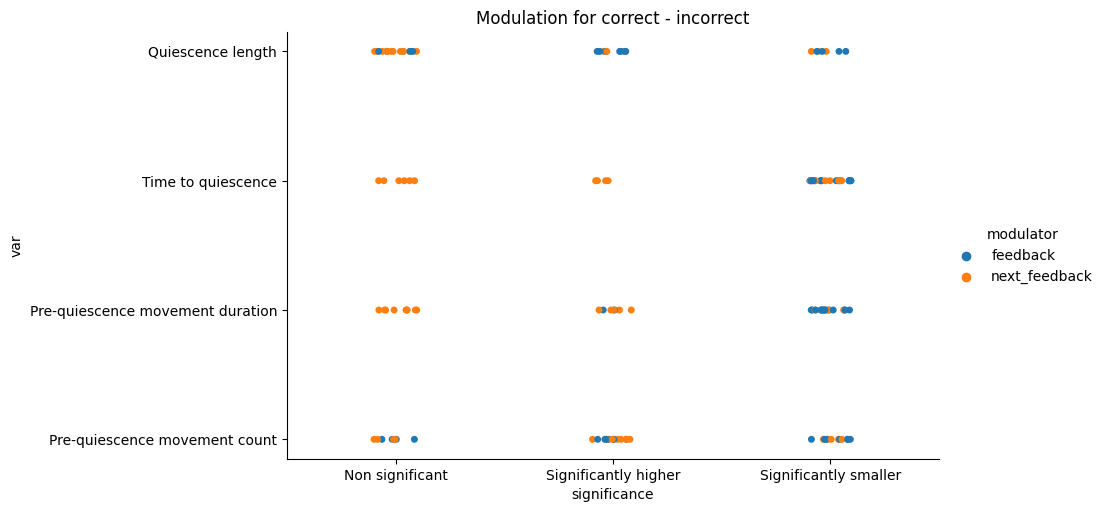

In [6]:
hues = [-1., 1.]
hue = ['feedback', 'next_feedback']
vars = ['quiesc_length', 'time_to_quiesc', 'pre_quiesc_move_duration', 'pre_quiesc_move_count']
var_names = ['Quiescence length', 'Time to quiescence', 'Pre-quiescence movement duration',
             'Pre-quiescence movement count']

p_values = pd.DataFrame(columns=['var', 'modulator', 'significance', 'session'])

for s, session in enumerate(pass_qc['session_uuid']):

    try:
        # Get trials
        session_trials = one.load_object(session, obj='trials', namespace='ibl')
        session_trials = session_trials.to_df()
        
        bin_size = 0.05
        df = wheel_trial_epoch(one, session_trials, session, bin_size).dropna()
        df['time_count'] = np.ones(len(df['movement']))
        
        processed_quiescence = process_quiescence(df)
        
        for h, hh in enumerate(hue):
            for v, var in enumerate(vars):
            
                var_data = processed_quiescence[['trial', var, hue[h]]]
                    
                group_1 = list(var_data.loc[var_data[hue[h]]==hues[0], var])
                group_2 = list(var_data.loc[var_data[hue[h]]==hues[1], var])
                    
                _, p_v = stats.ttest_ind(group_1, group_2)

                # Save results
                p_value = pd.DataFrame(columns=['var', 'modulator', 'significance', 'session'], index=range(1))
                p_value['var'] = var_names[v]
                p_value['modulator'] = hue[h]
                p_value['session'] = session
                
                if (np.nanmean(group_2) > np.nanmean(group_1)) and (p_v < 0.05):
                    p_value['significance'] = 'Significantly higher'
                elif (np.nanmean(group_2) < np.nanmean(group_1)) and (p_v < 0.05):
                    p_value['significance'] = 'Significantly smaller'
                elif p_v >= 0.05:
                    p_value['significance'] = 'Non significant'
                    
                # Append
                p_values = pd.concat([p_values, p_value], ignore_index=True)
    except:
        print(session)

# Plot 

hue_names = np.array(['correct', 'incorrect'])
hue_numbers = np.array([1., -1.])

sns.catplot(y='var', x='significance', hue='modulator', data=p_values, 
order=['Non significant', 'Significantly higher', 'Significantly smaller'],
height=5, aspect=2)

plt.title(str('Modulation for ' + str(hue_names[np.where(hue_numbers==hues[1])][0]) + 
            ' - ' + str(hue_names[np.where(hue_numbers==hues[0])][0])))
plt.show()


In [ ]:
# Plot 
hue_types = ['side', 'choice', 'correct']
fig, ax = plt.subplots(nrows=5 , ncols=len(hue_types), sharex=True, sharey=True, figsize=[20, 20])
for h, hue in enumerate(hue_types):
    if hue in ['choice', 'side']:
        hue_names = np.array(['left', 'right'])
        hue_numbers = np.array([-1.0, 1.0])
    elif hue == 'correct':
        hue_names = np.array(['correct', 'incorrect'])
        hue_numbers = np.array([1., 0.])

    p_values = stats_features_per_epoch_sess(idxs, session_all, matrix_all, matrix_all_unnorm, hue, label)

    trial_epochs = p_values['epoch'].unique()
    p_values.loc[p_values['significance']=='Significantly higher', 'significance'] = 1
    p_values.loc[p_values['significance']=='Significantly smaller', 'significance'] = 1
    p_values.loc[p_values['significance']=='Significantly higher', 'significance'] = 1
    p_values.loc[p_values['significance']=='Non significant', 'significance'] = 0
    for e, epoch in enumerate(trial_epochs):
        use_data = p_values.loc[p_values['epoch']==epoch]
        
        sns.barplot(y='var', x='significance', data=use_data, ax=ax[e, h], errorbar=None)  # order=['Non significant', 'Significant'],
        ax[e, h].set_xlabel('Fraction of modulated sessions')
        ax[e, h].set_title(str('Modulation by ' + hue + ' on ' + epoch))
        ax[e, h].set_xlim([0, 1])
plt.tight_layout()
plt.show()

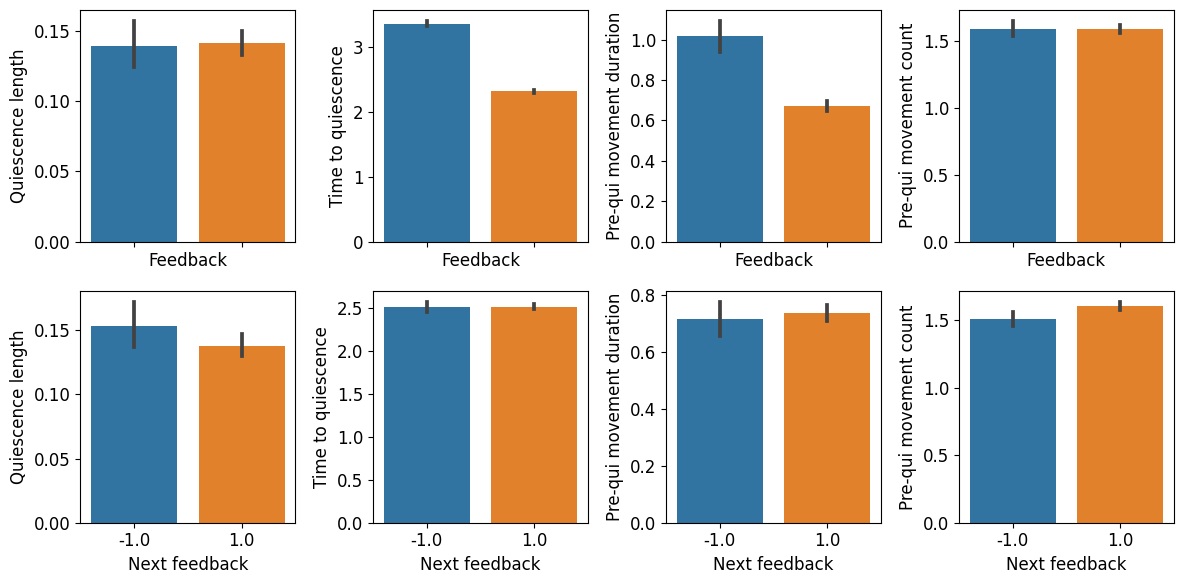

In [40]:
vars_to_plot = ['quiesc_length', 'time_to_quiesc', 'pre_quiesc_move_duration',
                'pre_quiesc_move_count']
var_names = ['Quiescence length', 'Time to quiescence', 'Pre-qui movement duration',
             'Pre-qui movement count']
fig, axs = plt.subplots(nrows=2, ncols=len(vars_to_plot), sharex=True, sharey=False, figsize=[12, 6])
plt.rc('font', size=12)
for v, var in enumerate(vars_to_plot):
    
    sns.barplot(y=var, x='feedback', data=processed_quiescence, ax=axs[0, v])
    sns.barplot(y=var, x='next_feedback', data=processed_quiescence, ax=axs[1, v])
    axs[0, v].set_ylabel(var_names[v])
    axs[1, v].set_ylabel(var_names[v])
    axs[0, v].set_xlabel('Feedback')
    axs[1, v].set_xlabel('Next feedback')
plt.tight_layout()
plt.show()


<AxesSubplot: xlabel='prev_feedback', ylabel='quiesc_length'>

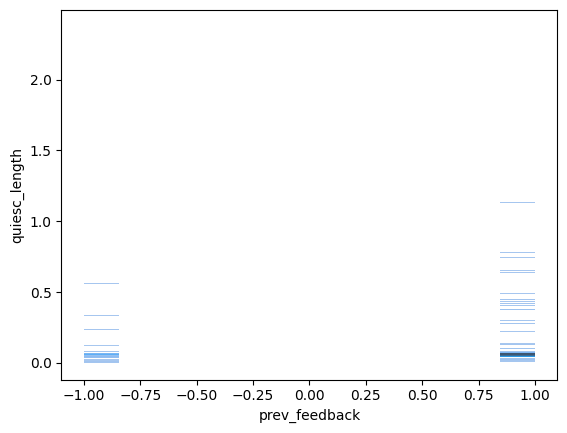

In [38]:
sns.histplot(y='quiesc_length', x='prev_feedback', data=processed_quiescence)
# plt.xlim([0,1])

## Analyze stillness and movement periods

d32876dd-8303-4720-8e7e-20678dc2fd71
72982282-e493-45ee-87ce-aa45cb3a3ec1
6434f2f5-6bce-42b8-8563-d93d493613a2
64e3fb86-928c-4079-865c-b364205b502e
15948667-747b-4702-9d53-354ac70e9119
288bfbf3-3700-4abe-b6e4-130b5c541e61
fc43390d-457e-463a-9fd4-b94a0a8b48f5
3d59aa1a-b4ba-47fe-b9cf-741b5fdb0c7b


/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


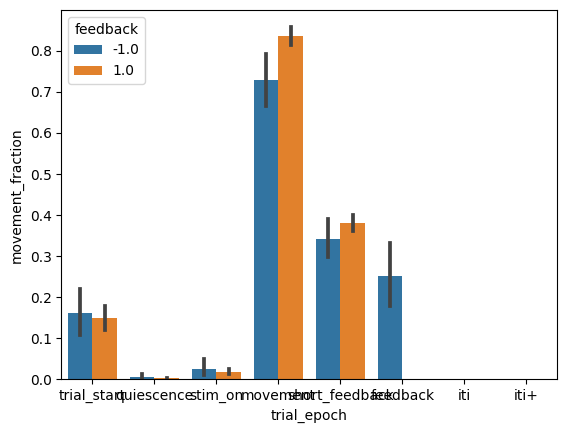

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


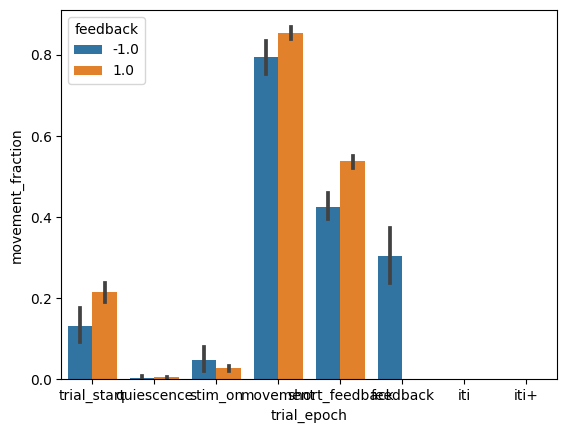

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


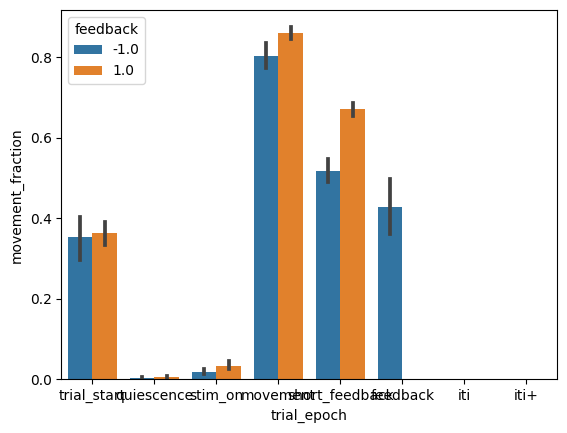

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


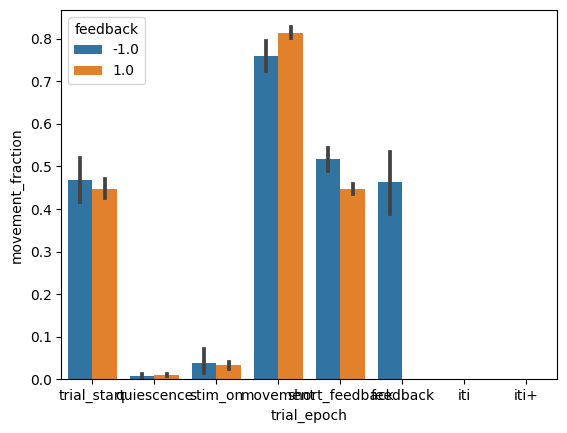

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


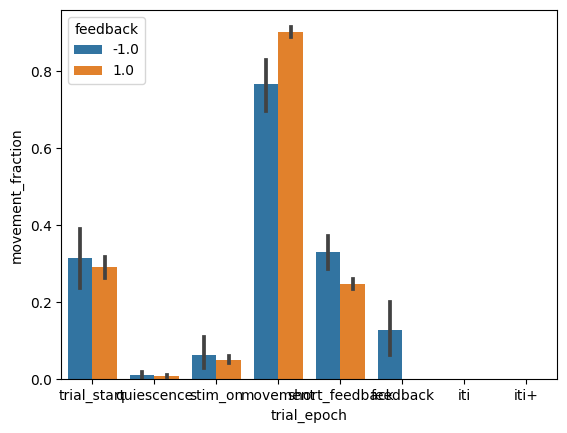

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


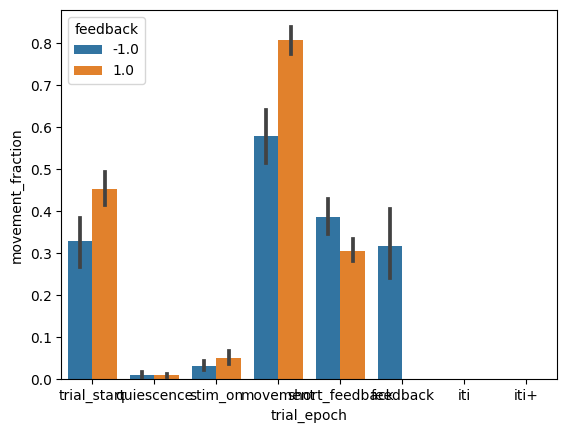

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


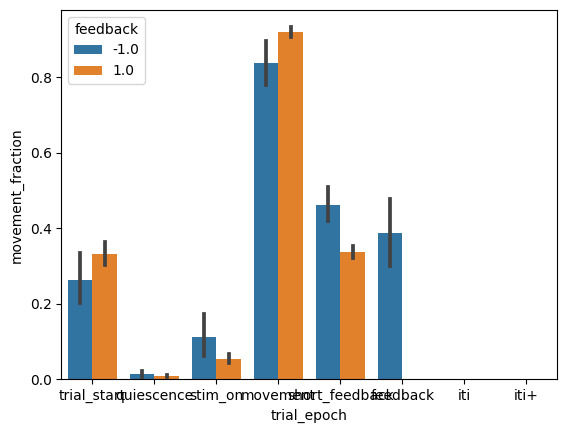

local md5 mismatch on dataset: churchlandlab/Subjects/CSHL049/2020-01-11/001/alf/_ibl_trials.stimOff_times.npy
/home/ines/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL049/2020-01-11/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.60k/4.60k [00:00<00:00, 13.9kB/s]
/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


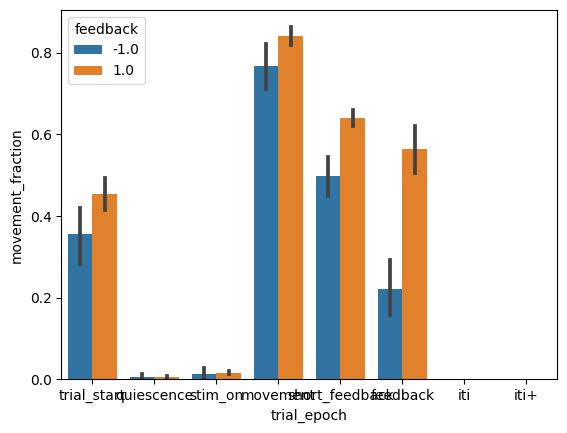

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


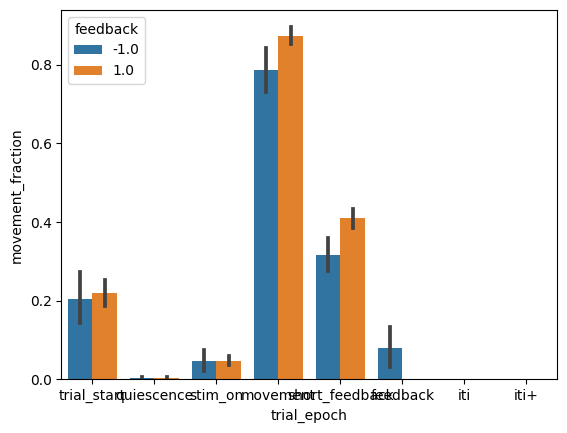

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


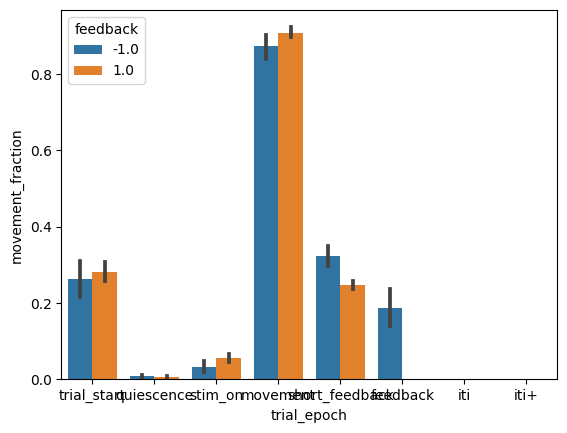

/tmp/ipykernel_19235/1074084796.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())


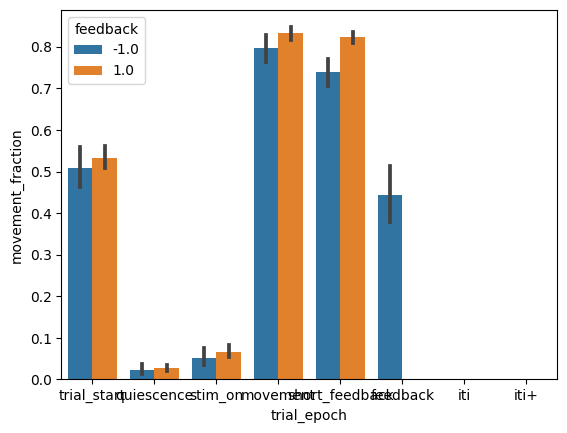

f312aaec-3b6f-44b3-86b4-3a0c119c0438


In [115]:
for s, session in enumerate(pass_qc['session_uuid'][10:]):
    try:
        # Get trials
        session_trials = one.load_object(session, obj='trials', namespace='ibl')
        session_trials = session_trials.to_df()
        
        bin_size = 0.05
        df = wheel_trial_epoch(one, session_trials, session, bin_size).dropna()
        df['time_count'] = np.ones(len(df['movement']))
        
        mean_label = pd.DataFrame(df.groupby(['trial', 'trial_epoch', 'feedback', 'prev_feedback'])['movement', 'time_count'].sum())
        mean_label = mean_label.reset_index(level=[0, 1, 2, 3])
        mean_label['movement_fraction'] = mean_label['movement'] / mean_label['time_count']
        
        # Stilness per trial epoch
        var_order = ['trial_start', 'quiescence', 'stim_on', 'movement', 'short_feedback', 'feedback', 'iti', 'iti+']
        sns.barplot(x='trial_epoch', hue='feedback', y = 'movement_fraction', data=mean_label, order=var_order)
        # plt.ylim([0, 1])
        plt.show()
    except:
        print(session)
